# Dataset boolean6: implicit conjunction - different predicates applied on a person (reference problem)

Generating sentences of the form

- 1) **c, who is a PROFESSION, saw X, c didn't saw X** -- contradiction 
- 1) **c, who is a PROFESSION, visit d, c didn't  visit d ** -- contradiction
- 1) **c, who is a PROFESSION, bought Y, c didn't  buy Y ** -- contradiction 


- 2) **c, who is a PROFESSION, saw X, c isn't a PROFESSION ** -- contradiction
- 2) **c, who is a PROFESSION, visit d, c isn't a PROFESSION ** -- contradiction
- 2) **c, who is a PROFESSION, bought Y, c isn't a PROFESSION ** -- contradiction


- 3) **c, who is a PROFESSION1, saw X, c, who is a PROFESSION2, didn't saw X**  -- non-contradiction
- 3) **c, who is a PROFESSION1, visit d, c, who is a PROFESSION2, didn't visit d**  -- non-contradiction
- 3) **c, who is a PROFESSION1, bought Y, c, who is a PROFESSION2, didn't bought Y**  -- non-contradiction


- 4) **c, who is a PROFESSION, saw X, c, e's father (mother), didn't saw X** -- non-contradiction
- 4) **c, who is a PROFESSION, visit d, c, e's father (mother), didn't visit d** -- non-contradiction
- 4) **c, who is a PROFESSION, bought Y, c, e's father (mother), didn't bought Y** -- non-contradiction


- 5) **c saw Z running COMPLEMENT, c didn't saw Z running** -- contradiction 
- 5) **c saw Z driving COMPLEMENT, c didn't saw Z driving** -- contradiction 



- 6) **c saw X running COMPLEMENT1, c didn't saw X running  COMPLEMENT2** -- non-contradiction
- 6) **c saw X driving COMPLEMENT1, c didn't saw X driving COMPLEMENT2** -- non-contradiction 


X = [a girl running, a blue plane, the new Tesla sport car, the new Marvel movie, a dog chasing a cat, etc.]

Y = [the new Tesla Roadster, etc.]

Z = [name, a girl, a boy]



In [1]:
import numpy as np
import pandas as pd
from word_lists import male_names, female_names, name_list
from word_lists import professions, color_list, city_list
import os
import inspect
import sys
import itertools

almost_current = os.path.abspath(inspect.getfile(inspect.currentframe()))
currentdir = os.path.dirname(almost_current)
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from plots.functions import plot_histogram_from_labels # noqa

% matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected

In [2]:
def get_new_item(item_list, src_list):
    size = len(src_list)
    new_item = src_list[np.random.choice(size)]
    while new_item in item_list: 
        new_i = np.random.choice(size)
        new_item = src_list[new_i]
    return new_item

In [3]:
for i in range(len(name_list)):
    name = get_new_item([], name_list)
    new_name = get_new_item([name], name_list)
    assert name != new_name and name in name_list and new_name in name_list

In [4]:
upper_bound = 11000 / 6

COMPLEMENT_runnig = ["from a parade car",
                     "from PERSON's car",
                      "from a COLOR car",
                      "from a COLOR bus",
                      "from a special recently built bus",
                      "from a COLOR school bus",
                      "from a bus going to CITY",
                      "from a COLOR bus with a new engine"]

COMPLEMENT_driving = ["a COLOR car",
                      "in CITY",
                      "PERSON's car",
                      "a COLOR bicycle",
                      "PERSON's bicycle",
                      "an electric COLOR bicycle",
                      "PERSON's new Tesla Roadster"]

what_I_see = ["a girl running",
              "a blue plane",
              "the new Tesla Roadster",
              "the new Marvel movie from the Russo Brothers", 
              "a dog chasing a cat",
              "the accident",
              "the car crash",
              "a strange add",
              "the city mayor"]

what_I_buy = ["the new Tesla Roadster",
              "the new Marvel movie from the Russo Brothers",
              "a Chilean wine",
              "a Macbook",
              "a cup of coffee",
              "a pizza",
              "a japanese novel"]

- 1) **c, who is a PROFESSION, saw X, c didn't saw X** -- contradiction 
- 1) **c, who is a PROFESSION, visit d, c didn't  visit d ** -- contradiction
- 1) **c, who is a PROFESSION, bought Y, c didn't  buy Y ** -- contradiction 

In [5]:
all_sentences_1 = []
for i in range(int(upper_bound)):
    person1 = get_new_item([], name_list)
    person2 = get_new_item([person1], name_list)
    buy = get_new_item([], what_I_buy)
    see = get_new_item([], what_I_see)
    profession = get_new_item([], professions)
    if i % 3 == 0:
        sentence = "{}, who is a {}, saw {};{} didn't saw {}".format(person1, profession, see, person1, see)
    elif i % 3 ==1:
        sentence = "{}, who is a {}, visit {};{} didn't visit {}".format(person1, profession, person2, person1, person2)
    else:
        sentence = "{}, who is a {}, bought {};{} didn't buy {}".format(person1, profession, buy, person1, buy)
    all_sentences_1.append(sentence)

all_sentences_1 = [sentence.split(";") + [1] for sentence in all_sentences_1]

for sentence in all_sentences_1[0:10]:
    print(sentence)

['Mark, who is a secretary, saw a dog chasing a cat', "Mark didn't saw a dog chasing a cat", 1]
['Yvonne, who is a hairdresser, visit Willie', "Yvonne didn't visit Willie", 1]
['James, who is a tailor, bought the new Marvel movie from the Russo Brothers', "James didn't buy the new Marvel movie from the Russo Brothers", 1]
['Terrance, who is a plumber, saw the city mayor', "Terrance didn't saw the city mayor", 1]
['Joseph, who is a barber, visit Agnes', "Joseph didn't visit Agnes", 1]
['Edwin, who is a chef, bought a japanese novel', "Edwin didn't buy a japanese novel", 1]
['Dan, who is a chef, saw the new Tesla Roadster', "Dan didn't saw the new Tesla Roadster", 1]
['Janie, who is a cop, visit David', "Janie didn't visit David", 1]
['Mamie, who is a pilot, bought a cup of coffee', "Mamie didn't buy a cup of coffee", 1]
['Nellie, who is a cleaner, saw the new Marvel movie from the Russo Brothers', "Nellie didn't saw the new Marvel movie from the Russo Brothers", 1]


- 2) **c, who is a PROFESSION, saw X, c isn't a PROFESSION ** -- contradiction
- 2) **c, who is a PROFESSION, visit d, c isn't a PROFESSION ** -- contradiction
- 2) **c, who is a PROFESSION, bought Y, c isn't a PROFESSION ** -- contradiction

In [6]:
all_sentences_2 = []
for i in range(int(upper_bound)):
    person1 = get_new_item([], name_list)
    person2 = get_new_item([person1], name_list)
    buy = get_new_item([], what_I_buy)
    see = get_new_item([], what_I_see)
    profession = get_new_item([], professions)
    if i % 3 == 0:
        sentence = "{}, who is a {}, saw {};{} isn't a {}".format(person1, profession, see, person1, profession)
    elif i % 3 ==1:
        sentence = "{}, who is a {}, visit {};{} isn't a {}".format(person1, profession, person2, person1, profession)
    else:
        sentence = "{}, who is a {}, bought {};{} isn't a {}".format(person1, profession, buy, person1, profession)
    all_sentences_2.append(sentence)

all_sentences_2 = [sentence.split(";") + [1] for sentence in all_sentences_2]

for sentence in all_sentences_2[0:10]:
    print(sentence)

['Thelma, who is a fireman, saw a dog chasing a cat', "Thelma isn't a fireman", 1]
['Gina, who is a lawyer, visit Dean', "Gina isn't a lawyer", 1]
['Crystal, who is a engineer, bought a japanese novel', "Crystal isn't a engineer", 1]
['Casey, who is a painter, saw a girl running', "Casey isn't a painter", 1]
['Troy, who is a photographer, visit Lydia', "Troy isn't a photographer", 1]
['Martha, who is a judge, bought a cup of coffee', "Martha isn't a judge", 1]
['Rita, who is a photographer, saw the new Marvel movie from the Russo Brothers', "Rita isn't a photographer", 1]
['Iris, who is a photographer, visit Lauren', "Iris isn't a photographer", 1]
['Theodore, who is a plumber, bought the new Marvel movie from the Russo Brothers', "Theodore isn't a plumber", 1]
['Marjorie, who is a painter, saw the new Tesla Roadster', "Marjorie isn't a painter", 1]


- 3) **c, who is a PROFESSION1, saw X, c, who is a PROFESSION2, didn't saw X**  -- non-contradiction
- 3) **c, who is a PROFESSION1, visit d, c, who is a PROFESSION2, didn't visit d**  -- non-contradiction
- 3) **c, who is a PROFESSION1, bought Y, c, who is a PROFESSION2, didn't bought Y**  -- non-contradiction

In [7]:
all_sentences_3 = []
for i in range(int(upper_bound)):
    person1 = get_new_item([], name_list)
    person2 = get_new_item([person1], name_list)
    buy = get_new_item([], what_I_buy)
    see = get_new_item([], what_I_see)
    profession1 = get_new_item([], professions)
    profession2 = get_new_item([profession1], professions)
    assert profession1 != profession2 
    if i % 3 == 0:
        sentence = "{}, who is a {}, saw {};{}, who is a {}, didn't saw {}".format(person1, profession1, see, person1, profession2, see)
    elif i % 3 ==1:
        sentence = "{}, who is a {}, visit {};{}, who is a {}, didn't visit {}".format(person1, profession1, person2, person1, profession2, person2)
    else:
        sentence = "{}, who is a {}, bought {};{}, who is a {}, didn't buy {}".format(person1, profession1, buy, person1, profession2, buy)
    all_sentences_3.append(sentence)

all_sentences_3 = [sentence.split(";") + [0] for sentence in all_sentences_3]

for sentence in all_sentences_3[0:10]:
    print(sentence)

['Rafael, who is a butcher, saw the city mayor', "Rafael, who is a flight attendant, didn't saw the city mayor", 0]
['Rene, who is a tailor, visit Alexander', "Rene, who is a receptionist, didn't visit Alexander", 0]
['Yvette, who is a pilot, bought a pizza', "Yvette, who is a tailor, didn't buy a pizza", 0]
['Elaine, who is a doctor, saw the car crash', "Elaine, who is a vet, didn't saw the car crash", 0]
['Maxine, who is a dentist, visit Greg', "Maxine, who is a barber, didn't visit Greg", 0]
['Nina, who is a cashier, bought a cup of coffee', "Nina, who is a hairdresser, didn't buy a cup of coffee", 0]
['Kenneth, who is a fireman, saw the new Marvel movie from the Russo Brothers', "Kenneth, who is a cleaner, didn't saw the new Marvel movie from the Russo Brothers", 0]
['Jack, who is a cop, visit Cheryl', "Jack, who is a builder, didn't visit Cheryl", 0]
['Eileen, who is a hairdresser, bought a Chilean wine', "Eileen, who is a engineer, didn't buy a Chilean wine", 0]
['Erin, who is a 

- 4) **c, who is a PROFESSION, saw X, c, e's father (mother), didn't saw X** -- non-contradiction
- 4) **c, who is a PROFESSION, visit d, c, e's father (mother), didn't visit d** -- non-contradiction
- 4) **c, who is a PROFESSION, bought Y, c, e's father (mother), didn't bought Y** -- non-contradiction

In [8]:
all_sentences_4 = []
for i in range(int(upper_bound)):
    if i % 2 == 0:
        person1 = get_new_item([], female_names)
        parent = "mother"
    else:
        person1 = get_new_item([], male_names)
        parent = "father"
    person2 = get_new_item([person1], name_list)
    person3 = get_new_item([person1, person2], name_list)
    buy = get_new_item([], what_I_buy)
    see = get_new_item([], what_I_see)
    profession1 = get_new_item([], professions)
    profession2 = get_new_item([profession1], professions)
    if i % 3 == 0:
        sentence = "{}, who is a {}, saw {};{}, {}'s {}, didn't saw {}".format(person1, profession1, see, person1, person3, parent, see)
    elif i % 3 ==1:
        sentence = "{}, who is a {}, visit {};{}, {}'s {}, didn't visit {}".format(person1, profession1, person2, person1,person3, parent,person2)
    else:
        sentence = "{}, who is a {}, bought {};{}, {}'s {}, didn't buy {}".format(person1, profession1, buy, person1, person3, parent, buy)
    all_sentences_4.append(sentence)

all_sentences_4 = [sentence.split(";") + [0] for sentence in all_sentences_4]

for sentence in all_sentences_4[0:10]:
    print(sentence)

['Antoinette, who is a lawyer, saw the accident', "Antoinette, Adam's mother, didn't saw the accident", 0]
['Kyle, who is a vet, visit Sylvia', "Kyle, Brandi's father, didn't visit Sylvia", 0]
['Sherri, who is a nurse, bought a japanese novel', "Sherri, Mamie's mother, didn't buy a japanese novel", 0]
['Keith, who is a hairdresser, saw the city mayor', "Keith, Heidi's father, didn't saw the city mayor", 0]
['Bobbie, who is a barber, visit Brent', "Bobbie, Glenda's mother, didn't visit Brent", 0]
['Franklin, who is a butcher, bought a cup of coffee', "Franklin, Mike's father, didn't buy a cup of coffee", 0]
['Edith, who is a judge, saw a strange add', "Edith, Beulah's mother, didn't saw a strange add", 0]
['Roland, who is a pilot, visit Lindsay', "Roland, Tamara's father, didn't visit Lindsay", 0]
['Bonnie, who is a doctor, bought a pizza', "Bonnie, Stacy's mother, didn't buy a pizza", 0]
['Dustin, who is a plumber, saw the accident', "Dustin, Kelly's father, didn't saw the accident", 0

- 5) **c saw X running COMPLEMENT, c didn't saw X running** -- contradiction 
- 5) **c saw X driving COMPLEMENT, c didn't saw X driving** -- contradiction 

In [9]:
all_sentences_5 = []
for i in range(int(upper_bound + 1)):
    person1 = get_new_item([], name_list)
    object_list = [get_new_item([person1], name_list), "a girl", "a boy"]
    direct_object = get_new_item([], object_list)
    if i % 2 == 0:
        verb = "running"
        complement = get_new_item([], COMPLEMENT_runnig)
    else:
        verb = "driving"
        complement = get_new_item([], COMPLEMENT_driving)
    person2 = get_new_item([person1, direct_object], name_list)
    color = get_new_item([], color_list)
    city = get_new_item([], city_list)
    complement = complement.replace("PERSON's", person2 + "'s")
    complement = complement.replace("COLOR", color)
    complement = complement.replace("CITY", city)
    sentence = "{} saw {} {} {},{} didn't saw {} {}".format(person1,
                                                             direct_object,
                                                             verb,
                                                             complement,
                                                             person1,
                                                             direct_object,
                                                             verb)
    all_sentences_5.append(sentence)
    
all_sentences_5 = [sentence.split(",") + [1] for sentence in all_sentences_5]


for sentence in all_sentences_5[0:10]:
    print(sentence)

['Rose saw a boy running from a black school bus', "Rose didn't saw a boy running", 1]
["Donald saw Marilyn driving Ray's new Tesla Roadster", "Donald didn't saw Marilyn driving", 1]
['Felicia saw Susan running from a orange car', "Felicia didn't saw Susan running", 1]
["Susie saw Sherri driving Ana's bicycle", "Susie didn't saw Sherri driving", 1]
['Leon saw Gertrude running from a ashy bus', "Leon didn't saw Gertrude running", 1]
["Roland saw a girl driving Erika's car", "Roland didn't saw a girl driving", 1]
['Sean saw a girl running from a bus going to Blaj', "Sean didn't saw a girl running", 1]
['Alfred saw a girl driving a orange car', "Alfred didn't saw a girl driving", 1]
['Dorothy saw a boy running from a bus going to Cluj-Napoca', "Dorothy didn't saw a boy running", 1]
['Andre saw Brian driving a ashy bicycle', "Andre didn't saw Brian driving", 1]


- 6) **c saw X running COMPLEMENT1, c didn't saw X running  COMPLEMENT2** -- non-contradiction
- 6) **c saw X driving COMPLEMENT1, c didn't saw X driving COMPLEMENT2** -- non-contradiction 

In [10]:
all_sentences_6 = []
for i in range(int(upper_bound + 1)):
    person1 = get_new_item([], name_list)
    object_list = [get_new_item([person1], name_list), "a girl", "a boy"]
    direct_object = get_new_item([], object_list)
    if i % 2 == 0:
        verb = "running"
        COMPLEMENT = COMPLEMENT_runnig 
    else:
        verb = "driving"
        COMPLEMENT = COMPLEMENT_driving 
    
    complement1 = get_new_item([], COMPLEMENT)
    complement2 = get_new_item([complement1], COMPLEMENT)
    person2 = get_new_item([person1, direct_object], name_list)
    color = get_new_item([], color_list)
    city = get_new_item([], city_list)
    complement1 = complement1.replace("PERSON's", person2 + "'s")
    complement1 = complement1.replace("COLOR", color)
    complement1 = complement1.replace("CITY", city)
    person2 = get_new_item([person1, direct_object, person2], name_list)
    color = get_new_item([], color_list)
    city = get_new_item([], city_list)
    complement2 = complement2.replace("PERSON's", person2 + "'s")
    complement2 = complement2.replace("COLOR", color)
    complement2 = complement2.replace("CITY", city)
    sentence = "{} saw {} {} {}, {} didn't saw {} {} {}".format(person1,
                                                             direct_object,
                                                             verb,
                                                             complement1,
                                                             person1,
                                                             direct_object,
                                                             verb,
                                                             complement2)
    all_sentences_6.append(sentence)
    
all_sentences_6 = [sentence.split(",") + [0] for sentence in all_sentences_6]

for sentence in all_sentences_6[0:10]:
    print(sentence)

['Jesse saw Guy running from a black bus', " Jesse didn't saw Guy running from Irene's car", 0]
["Lynda saw a boy driving Loretta's bicycle", " Lynda didn't saw a boy driving a gray bicycle", 0]
['Judy saw a girl running from a orange bus with a new engine', " Judy didn't saw a girl running from a mango car", 0]
['Isabel saw Carole driving in Baia Mare', " Isabel didn't saw Carole driving Jeff's car", 0]
['Dwight saw a girl running from a special recently built bus', " Dwight didn't saw a girl running from a parade car", 0]
['Philip saw a girl driving in Blaj', " Philip didn't saw a girl driving a icy bicycle", 0]
['Dave saw a boy running from a parade car', " Dave didn't saw a boy running from Stephen's car", 0]
['Darren saw Catherine driving in Turda', " Darren didn't saw Catherine driving an electric green bicycle", 0]
['Dan saw a girl running from a special recently built bus', " Dan didn't saw a girl running from a gray school bus", 0]
['Wayne saw a girl driving a green bicycle', 

In [11]:
np.random.shuffle(all_sentences_1)
np.random.shuffle(all_sentences_2)
np.random.shuffle(all_sentences_3)
np.random.shuffle(all_sentences_4)
np.random.shuffle(all_sentences_5)
np.random.shuffle(all_sentences_6)


size1 = len(all_sentences_1)
size2 = len(all_sentences_2)
size3 = len(all_sentences_3)
size4 = len(all_sentences_4)
size5 = len(all_sentences_5)
size6 = len(all_sentences_6)


all_sentences = all_sentences_1 + all_sentences_2 + all_sentences_3 + all_sentences_4
all_sentences += all_sentences_5 + all_sentences_6
size = len(all_sentences)

print("type 1 size = {}".format(size1))
print("type 2 size = {}".format(size2))
print("type 3 size = {}".format(size3))
print("type 4 size = {}".format(size4))
print("type 5 size = {}".format(size5))
print("type 6 size = {}".format(size6))
print("total size = {}".format(size))

type 1 size = 1833
type 2 size = 1833
type 3 size = 1833
type 4 size = 1833
type 5 size = 1834
type 6 size = 1834
total size = 11000


### Generating a train DataFrame with 10000 examples and a test DataFrame with 1000 examples 

In [12]:
sentence_1 = [triple[0] for triple in all_sentences]
sentence_2 = [triple[1] for triple in all_sentences]
label = [triple[2] for triple in all_sentences]

df_dict = {"sentence1": sentence_1,
           "sentence2": sentence_2,
           "label": label}
        
df = pd.DataFrame(df_dict)
df = df[["sentence1", "sentence2", "label"]]
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:10000]
df_test = df.iloc[10000:]

df.tail()    

,sentence1,sentence2,label
10995,"Manuel, who is a musician, saw the new Marvel ...","Manuel, who is a judge, didn't saw the new Mar...",0
10996,"Angie, who is a journalist, bought a pizza",Angie didn't buy a pizza,1
10997,"Daniel, who is a fireman, bought a Chilean wine","Daniel, Tanya's father, didn't buy a Chilean wine",0
10998,Morris saw Louise running from a bus going to ...,Morris didn't saw Louise running from a speci...,0
10999,"Pearl, who is a judge, bought the new Tesla Ro...",Pearl didn't buy the new Tesla Roadster,1


#### Looking at the label distribution

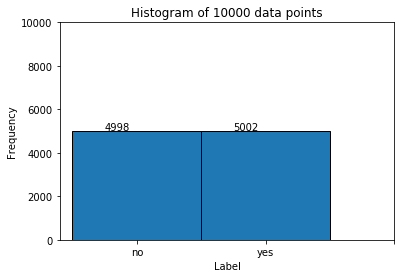

In [13]:
train_label = df_train["label"].values
plot_histogram_from_labels(train_label, ["no", "yes"], "boolean6_train.png")

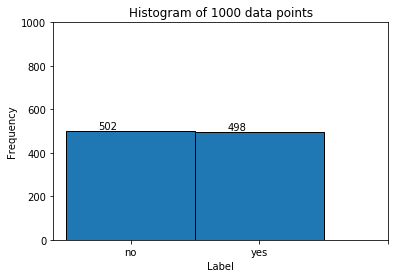

In [14]:
test_label = df_test["label"].values
plot_histogram_from_labels(test_label, ["no", "yes"], "boolean6_test.png")

### Saving to CSV

In [15]:
df_train.to_csv("boolean6_train.csv", index=False)
df_test.to_csv("boolean6_test.csv", index=False)